# Customer Segmentation Dataset
**Project : Creating Customer Segments - Unsupervised Learning**

**The Challenge**

Given the dataset related to xyz - Car Finance Company, we have some basic data about the customers like Customer ID, age, loan amount, deposit, car type, area, application status and funding status. We want to identify and understand the target customers so that this information can be given to marketing team and create a beneficial strategic plan.

**Background Work**

It is very essential to have a good understanding about the domain that the company works on. So, here are few of the useful informations that I noted : 
1. The Annual Percentage Rate(APR) is given based on the Credit Score(CR), the better the CR score, lesser the APR.
2. The Finance company makes the profit only when a customer uses the funded provided to him/her and pays back the interest. So, its important to concentrate on conversion rate of approved customers to funded.

**Table of Contents**
1. Data Preprocessing
2. Exploratory Data Analysis
3. Principal Component Analysis
4. K-Means Clustering to group the customers
5. Marketing Strategy 

In [2]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Case_Study_data_for_test.csv')
df.head()

,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,9997,61,Convertible,"£24,108.00",£881.00,rural,0.15,approved,No,NaN,NaN,NaN,NaN,NaN
1,9996,42,Saloon,"£5,988.00",£967.00,rural,0.20,approved,No,NaN,NaN,NaN,NaN,NaN
2,9995,57,Saloon,"£5,099.00",£973.00,urban,0.15,approved,No,NaN,NaN,NaN,NaN,NaN
3,9994,32,Convertible,"£20,774.00","£1,478.00",rural,NaN,declined,NaN,NaN,NaN,NaN,NaN,NaN
4,9993,29,Saloon,"£4,612.00",£774.00,urban,NaN,declined,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing Data

In [3]:
#Checking the available column types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
ID                     10000 non-null int64
age                    10000 non-null int64
car_type               10000 non-null object
 Loanamount            10000 non-null object
 Deposit               10000 non-null object
area                   10000 non-null object
APR                    6470 non-null float64
application_outcome    10000 non-null object
Funded                 6470 non-null object
Unnamed: 9             0 non-null float64
Unnamed: 10            0 non-null float64
Unnamed: 11            0 non-null float64
Unnamed: 12            0 non-null float64
Unnamed: 13            0 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 1.1+ MB


In [4]:
#dropping the null columns
df = df.drop(df.columns[[9,10,11,12,13]],axis = 1)

In [5]:
df.columns

Index(['ID', 'age', 'car_type', ' Loanamount ', ' Deposit ', 'area', 'APR',
       'application_outcome', 'Funded '],
      dtype='object')

In [6]:
#Cleaning the parameter names
df.columns = df.columns.str.lower().str.replace(' ', '')
df['loanamount']= df['loanamount'].str.replace('£','').str.replace(',','')
df['deposit'] = df['deposit'].str.replace('£','').str.replace(',','')
df['loanamount'] =df['loanamount'].astype(float)
df['deposit'] = df['deposit'].astype(float)

It was observed that there were 5 Unnamed dummy columns and subsequently removed. The names of parameters contained unwanted spacing, which were renamed so that it becomes easy to use. The loan amount and deposit parameters were converted to type float.

# Exploratory Data Analysis


In [7]:
#The number of values that each parameter takes in. 
df.nunique()

id                     10000
age                       48
car_type                   3
loanamount              7517
deposit                 4293
area                       2
apr                        5
application_outcome        2
funded                     2
dtype: int64

Observed the number of values each parameter takes in and found that there are 5 category of APR and 3 types of car with customers belonging to either rural or urban area.

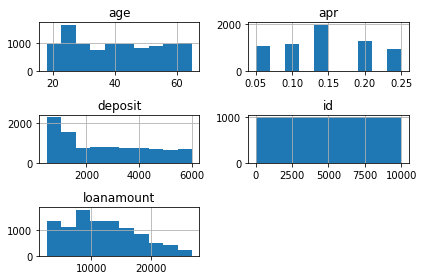

In [8]:
#histogram plot to identify the value counts.
df.hist()
plt.tight_layout()

In [9]:
#Identifying total number of loan approved.
print('The total number of people who got loan approvals : {}'.format(df['apr'].count()))

The total number of people who got loan approvals : 6470


In [10]:
#number of people from rural area
total_rural_appl = df.query('area =="rural"').count()[0]

#number of people from rural area who got loan approval declined.
total_declined_rural = df.query('area=="rural" and application_outcome=="declined"').count()[0]
total_approved_rural = total_rural_appl - total_declined_rural


print("The number of ppl who applied from rural area : {} \nThe number of ppl who got approval declined : {} \nThe number of ppl who got approval : {}".format(total_rural_appl,total_declined_rural,total_approved_rural))
print("Approval rate in Rural Area : {:.2f}%".format(total_approved_rural/total_rural_appl * 100))

The number of ppl who applied from rural area : 5290 
The number of ppl who got approval declined : 2247 
The number of ppl who got approval : 3043
Approval rate in Rural Area : 57.52%


In [11]:
#number of people from urban area
total_urban_appl = df.query('area =="urban"').count()[0]

#number of people from urban area who got loan approval declined.
total_declined_urban = df.query('area=="urban" and application_outcome=="declined"').count()[0]
total_approved_urban = total_urban_appl - total_declined_urban


print("The number of ppl who applied from urban area : {} \nThe number of ppl who got approval declined : {} \nThe number of ppl who got approval : {}".format(total_urban_appl,total_declined_urban,total_approved_urban))
print("Approval rate in Urban Area : {:.2f}%".format(total_approved_urban/total_urban_appl * 100))

The number of ppl who applied from urban area : 4710 
The number of ppl who got approval declined : 1283 
The number of ppl who got approval : 3427
Approval rate in Urban Area : 72.76%


In [12]:
display(df.describe())

,id,age,loanamount,deposit,apr
count,10000.00000,10000.000000,10000.000000,10000.000000,6470.000000
mean,5000.50000,40.477400,11920.430200,2668.142100,0.148810
std,2886.89568,14.015903,5882.825283,1669.184029,0.064095
min,1.00000,18.000000,2502.000000,500.000000,0.050000
25%,2500.75000,27.000000,7527.250000,1106.000000,0.100000
50%,5000.50000,40.000000,11218.500000,2364.500000,0.150000
75%,7500.25000,53.000000,15922.750000,4079.250000,0.200000
max,10000.00000,65.000000,26986.000000,6000.000000,0.250000


It was observed that the customers age fell between 18 - 65 years. The average deposit amount was 2668.14 
with average APR = 14.88 %.

In [13]:
#The guy with maximum loan
df.query('loanamount == 26986')

,id,age,car_type,loanamount,deposit,area,apr,application_outcome,funded
5212,1730,47,Convertible,26986.0,2509.0,rural,0.15,approved,No


I was eager to know this, the maximum loan amount that a customer has taken as of now is 26986£ who is interested in Convertible car. 
His/Her application has been approved but not yet been funded.

In [14]:
#area-wise distribution of different car types.
area_wise_df = df.groupby('area')
area_wise_car_gp = area_wise_df.apply(lambda x : x.groupby('car_type'))
df.groupby(['area','car_type']).count()['id']

area   car_type   
rural  Convertible    1521
       SUV            2229
       Saloon         1540
urban  Convertible    1512
       SUV            1601
       Saloon         1597
Name: id, dtype: int64

The objective is to find some insights that can be used by the Marketing team. For this purpose, its better to focus on approved customer details.

In [15]:
#df_approved contains only details of customers whose applications were approved.
df_approved = df.query('application_outcome=="approved"')
#drop applcn outcome from df_approved.
df_approved.drop(['application_outcome'],axis=1,inplace= True)
df_approved.head(5)

/home/ak/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,id,age,car_type,loanamount,deposit,area,apr,funded
0,9997,61,Convertible,24108.0,881.0,rural,0.15,No
1,9996,42,Saloon,5988.0,967.0,rural,0.20,No
2,9995,57,Saloon,5099.0,973.0,urban,0.15,No
6,9985,49,SUV,9738.0,671.0,rural,0.15,Yes
7,9981,52,Saloon,6341.0,533.0,urban,0.15,No


Before Applying Principal Component Analysis it is very important that the values given to the Machine Learning
Algorithms are numeric. Hence, the column values of funded, area and car type are encoded using suitable encoding
technique - Label Encoding and One Hot Encoding.

In [16]:
#label encoding for funded column
df_approved['funded_cat'] = df_approved['funded'].astype('category')
df_approved['funded_cat'] = df_approved['funded_cat'].cat.codes
df_approved.drop(['funded'],axis = 1, inplace=True)
df_approved.head(5)

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,age,car_type,loanamount,deposit,area,apr,funded_cat
0,9997,61,Convertible,24108.0,881.0,rural,0.15,0
1,9996,42,Saloon,5988.0,967.0,rural,0.20,0
2,9995,57,Saloon,5099.0,973.0,urban,0.15,0
6,9985,49,SUV,9738.0,671.0,rural,0.15,1
7,9981,52,Saloon,6341.0,533.0,urban,0.15,0


In [17]:
#one hot encoding for car_type and area.
df_approved = pd.get_dummies(df_approved, columns=['car_type','area'], prefix = ['body','area'])

In [18]:
#Ensure that all variables are numeric.
df_approved = df_approved.reset_index(drop=True)
df_approved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6470 entries, 0 to 6469
Data columns (total 11 columns):
id                  6470 non-null int64
age                 6470 non-null int64
loanamount          6470 non-null float64
deposit             6470 non-null float64
apr                 6470 non-null float64
funded_cat          6470 non-null int8
body_Convertible    6470 non-null uint8
body_SUV            6470 non-null uint8
body_Saloon         6470 non-null uint8
area_rural          6470 non-null uint8
area_urban          6470 non-null uint8
dtypes: float64(3), int64(2), int8(1), uint8(5)
memory usage: 290.7 KB


**Comparison of Customer Conversion Rate Based on Area**

In [19]:
#Evaluating the total number of applied,approved and funded customers.
applied_arr = []
approved_arr = [] 
funded_arr = []

applied_arr.append(df.query('area =="rural"').count()[0])
approved_arr.append(df_approved.query('area_rural == 1').count()[0])
funded_arr.append(df_approved.query('area_rural == 1 and funded_cat == 1').count()[0])
applied_arr.append(df.query('area == "urban"').count()[0])
approved_arr.append(df_approved.query('area_urban == 1').count()[0])
funded_arr.append(df_approved.query('area_urban == 1 and funded_cat == 1').count()[0])

    

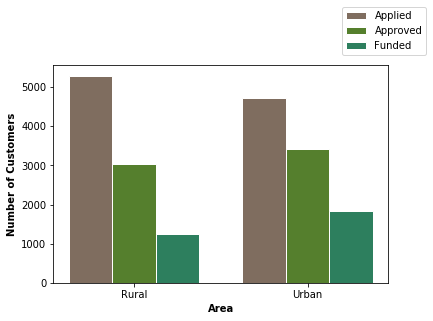

In [20]:
#Plot illustrating the comparison of number of customers in rural and urban area.
barWidth = 0.25
# Set position of bar on X axis
r1 = np.arange(len(applied_arr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, applied_arr, color='#7f6d5f', width=barWidth, edgecolor='white', label='Applied')
plt.bar(r2, approved_arr, color='#557f2d', width=barWidth, edgecolor='white', label='Approved')
plt.bar(r3, funded_arr, color='#2d7f5e', width=barWidth, edgecolor='white', label='Funded')
 
# Add xticks on the middle of the group bars
plt.xlabel('Area', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(applied_arr))], ['Rural', 'Urban'])
plt.ylabel('Number of Customers', fontweight='bold')
# Create legend & Show graphic
plt.legend(loc='best',bbox_to_anchor=(1,1.1),bbox_transform=plt.gcf().transFigure)
plt.show()

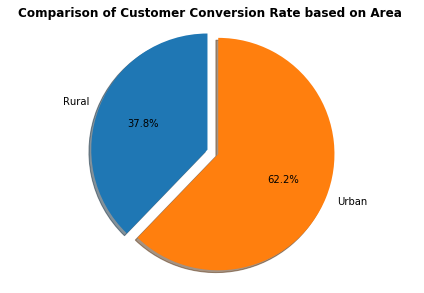

In [21]:
#Pie Chart to show the area wise comparison
conversion_rate = []
for i in range(len(applied_arr)):
    conversion_rate.append(round(((funded_arr[i]/applied_arr[i]) * 100),2))
labels = ['Rural', 'Urban']
colors = ['yellowgreen', 'gold']
# Pie chart
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(conversion_rate, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) # Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.title('Comparison of Customer Conversion Rate based on Area ',loc='center',fontweight='bold')
plt.autoscale
plt.show()

**Observation** : The ratio of customers who get the loan approval and use the fund is higher(62.2%) in urban area
    compared to rural area(37.8%) .
    
**Marketing Strategy** : For **paid adverstising** and **print media advertising**, it is recommended to invest **more** in **urban areas**. That is, setting up digital banners, distribution of pamphlets, coupons etc can be carried out in urban areas to attract more customers. 

**Comparison of Conversion Rate based on Age Category**

In [22]:
#Evaluating the total number of applied,approved and funded customers.
applied_arr =[]
approved_arr = []
funded_arr = []
lwr_bound = [18,26,36,46,56]
upr_bound = [25,35,45,55,65]

for i in range(len(lwr_bound)):
    applied_arr.append(len(df.age[(df.age <= upr_bound[i]) & (df.age >= lwr_bound[i])].values))
    approved_arr.append(len(df_approved.age[(df_approved.age <= upr_bound[i]) & (df_approved.age >= lwr_bound[i])].values))
    funded_arr.append(len(df_approved.age[(df_approved.age <= upr_bound[i]) & (df_approved.age >= lwr_bound[i]) & (df_approved.funded_cat == 1)].values))
    

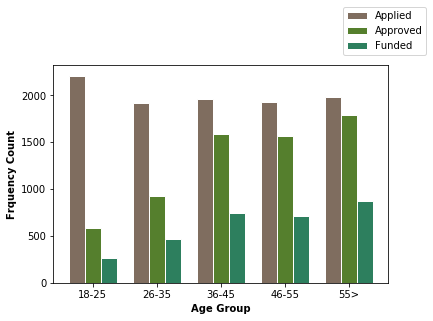

In [23]:
#Plot representing conversion rate of customers based on age categories
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(applied_arr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, applied_arr, color='#7f6d5f', width=barWidth, edgecolor='white', label='Applied')
plt.bar(r2, approved_arr, color='#557f2d', width=barWidth, edgecolor='white', label='Approved')
plt.bar(r3, funded_arr, color='#2d7f5e', width=barWidth, edgecolor='white', label='Funded')
 
# Add xticks on the middle of the group bars
plt.xlabel('Age Group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(applied_arr))], ['18-25', '26-35', '36-45', '46-55', '55>'])
plt.ylabel('Frquency Count', fontweight='bold')
# Create legend & Show graphic
plt.legend(loc='best',bbox_to_anchor=(1,1.1),bbox_transform=plt.gcf().transFigure)
plt.show()

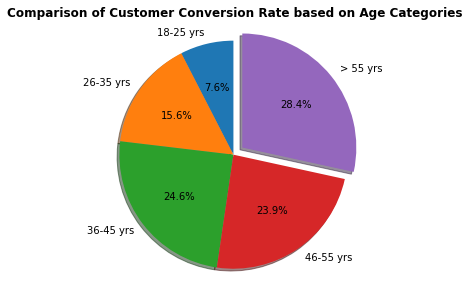

In [24]:
#Pie chart representing customer conversion rate based on age
conversion_rate = []
for i in range(len(applied_arr)):
    conversion_rate.append(round(((funded_arr[i]/applied_arr[i]) * 100),2))
labels = ['18-25 yrs', '26-35 yrs', '36-45 yrs', '46-55 yrs', '> 55 yrs']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','blue']
# Pie chart
explode = (0, 0, 0, 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(conversion_rate, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) # Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.tight_layout()
plt.title('Comparison of Customer Conversion Rate based on Age Categories ',loc='center',fontweight='bold')
plt.autoscale
plt.show()

**Observation** : It is clearly seen that major of our customers who get loan approval and use the fund belong to
    the age-group of 36-65.
    
**Marketing Strategy** : The **content** for **Digital Marketing**, Internet Marketing and Social Media Marketing 
    can be chosen such that it suits and **attracts** the people in **age-group** of **36-65 years**.

**Data Visualization using PCA**

Now that we have handled all the categorical variables, its time to normalize the data followed by visualization
using Principal Component Analysis. 

In [25]:
features = df_approved.columns.values
from sklearn.preprocessing import StandardScaler
x = df_approved.loc[:,features].values
x = StandardScaler().fit_transform(x)

In [26]:
x.shape

(6470, 11)

In [27]:
#Check whether the normalized data has a mean of zero and a standard deviation of one.
np.mean(x),np.std(x)

(1.916877971981723e-17, 0.9999999999999999)

In [28]:
from sklearn.decomposition import PCA
pca_appr_cust = PCA(n_components = 2)
prin_comp_appr_cust = pca_appr_cust.fit_transform(x)

df_pca_appr_cust = pd.DataFrame(data= prin_comp_appr_cust, columns=['Principal_Comp1','Principal_Comp2'])
df_pca_appr_cust.tail()

,Principal_Comp1,Principal_Comp2
6465,-0.945880,-1.443668
6466,3.316927,-0.801520
6467,2.583967,1.925990
6468,1.057181,-1.440438
6469,-0.721268,-1.722117


Now comes the critical part, next we will be projecting the Eleven-dimensional xyz company data to two-dimensional 
principal components.

In [29]:
#Amount of data covered
pca_appr_cust.explained_variance_ratio_

array([0.2088237 , 0.18451056])

From the above output, we can observe that the principal component 1 holds around 21% of the information while 
the principal component 2 holds only 18% of the information. Also, the other point to note is that while 
projecting eleven-dimensional data to a two-dimensional data, 61% information was lost.

Let's plot the visualization of the samples along the principal component - 1 and principal component - 2 axis. 
It should give good insight into how your samples are distributed among the two classes.

<Figure size 432x288 with 0 Axes>

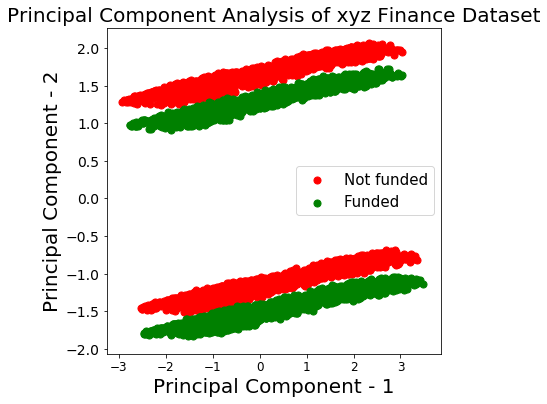

In [30]:
#Principal Component Analysis Chart
plt.figure()
plt.figure(figsize=(6,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of xyz Finance Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_approved['funded_cat'] == target
    plt.scatter(df_pca_appr_cust.loc[indicesToKeep, 'Principal_Comp1']
               , df_pca_appr_cust.loc[indicesToKeep, 'Principal_Comp2'],c = color, s = 50)
plt.autoscale
plt.legend(['Not funded','Funded'],loc = 'best',prop={'size': 15})
plt.show()

From the above graph, you can observe that the two classes Funded and Not Funded, when projected to a two-dimensional space, can be linearly separated. Since its clear that we can distinguish the 2 classes, correlation between the parameters is plotted and observed as shown below.

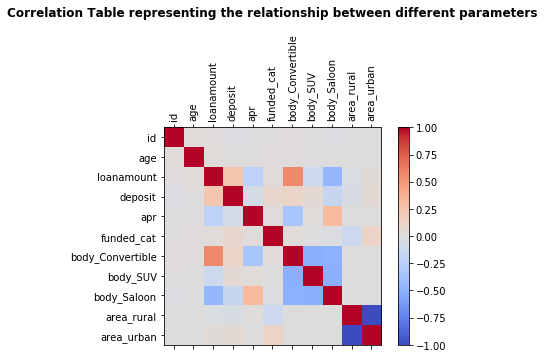

In [31]:
#correlation between the variables.
corr = df_approved.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_approved.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_approved.columns)
ax.set_yticklabels(df_approved.columns)
ax.set_title('Correlation Table representing the relationship between different parameters', pad=100,loc = 'center',fontweight='bold')
plt.autoscale
plt.show()

**Feature Selection and K-Means Clustering**

From the above correlation table its clear that there is a strong positive correlation between loan amount and
convertible car type. Let's try to cluster the set of customers using K-Means Clustering. For this we will make 
use of Elbow Method to determine the value of K for applying the algorithm.

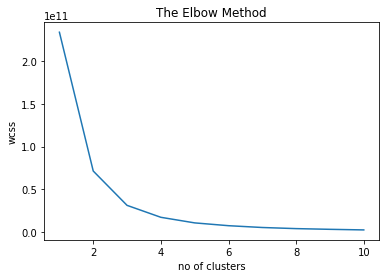

In [32]:
#Using Elbow method to determine the value of K.
from sklearn.cluster import KMeans
wcss=[]
X= df_approved.iloc[:, [2,6]].values
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

From the graph, its observed that the suitable value for K is 4. Building the model for same.

In [33]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

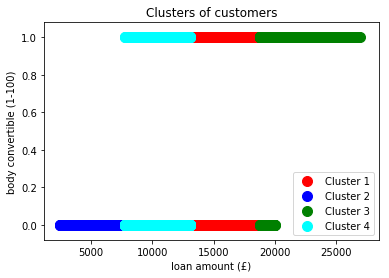

In [34]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('loan amount (£)')
plt.ylabel('body convertible (1-100)')
plt.legend()
plt.show()

Among all the clusters, it is seen that the customers in cluster 3 are approved more when the loan 
amount is greater than £17,000. 

In [35]:
total_cust_greater_17k = df.query('loanamount >= 17000').count()[1]
total_apr_cust_greater_17k = df_approved.query('loanamount >=17000').count()[1]

num_cust_body_conv = df_approved.query('loanamount >= 17000 and body_Convertible == 1').count()[1]
num_cust_body_saloon = df_approved.query('loanamount >= 17000 and body_Saloon == 1').count()[1]
num_cust_body_suv = df_approved.query('loanamount >= 17000 and body_SUV == 1').count()[1]

percent_val = (num_cust_body_conv/total_apr_cust_greater_17k) * 100

print('Total number of customers who applied for loanamount >= 17000 : {}'.format(total_cust_greater_17k))
print('Total number of customers who got loan sanctioned for loanamount >= 17000 : {}'.format(total_apr_cust_greater_17k))

print('Total number of loan sanctioned customers who applied for :\nSaloon Car : {}'.format(num_cust_body_saloon))
print('SUV Car : {}'.format(num_cust_body_suv))
print('Convertible Car : {}'.format(num_cust_body_conv))

print('Percentage of loan approvals for convertible car type : {}%'.format(round(percent_val,2)))

Total number of customers who applied for loanamount >= 17000 : 2102
Total number of customers who got loan sanctioned for loanamount >= 17000 : 1460
Total number of loan sanctioned customers who applied for :
Saloon Car : 0
SUV Car : 385
Convertible Car : 1075
Percentage of loan approvals for convertible car type : 73.63%


**Observation** : Based on Customer Segmentation results, among the customers, who applied for **loan amount greater than £17000**, **73.63%** of the people who got the loan approved opted for **Convertible car type**.

**Marketing Strategy** : Whenever a customer submits form with loan amount >= £17000, there is high probability that he may end up buying Convertible type car, so show him/her ads related to those type of cars.

# Summary of Strategies Proposed
1. For **paid adverstising** and **print media advertising**, it is recommended to invest **more** in **urban areas**. That is, setting up digital banners, distribution of pamphlets, coupons etc can be carried out in urban areas to attract more customers.
2. The **content** for Digital **Marketing**, Internet Marketing and Social Media Marketing can be chosen such that it suits and **attracts** the people in **age-group** of **36-65 years**.
3. Whenever a customer submits form with **loan amount >= £17000**, there is high probability that he may end up buying Convertible type car, so show him/her **ads related** to **Convertible type** of cars.